# <div style="color:red;background-color:Gray;padding:2%;border-radius:130px 130px;font-size:2em;text-align:center">**Solar Power Generation Prediction &  Analysis**</div>

In [ ]:
!python --version

Python 3.10.12


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from datetime import datetime,date,time
from pandas import Timestamp

In [ ]:
from google.colab import drive
drive.mount('/gdrive')

import warnings
warnings.filterwarnings("ignore")

Mounted at /gdrive


In [ ]:
pd.set_option('display.max_columns',None)
pd.set_option('display.max_rows',None)

<span style="background-color:red;
             color:white;
             font-size:17px;
             text-align:center;
             border-radius:30px 80px;
             font-weight:bold;
             border:2px solid red;
             padding:0px 20px;">2. Importing Power Generation & Weather Sensor Data
</span>

In [ ]:
solar_data = pd.read_csv('/content/drive/MyDrive/solar predict.csv')
solar_data = pd.DataFrame(solar_data)
solar_data.head()

,id,voltage,temperature,humidity,irradiation,Date_Time,DATE,TIME,DAY,MONTH,HOURS,MINUTES,TOTAL MINUTES PASS,DATE_STRING,total yield
0,1,6.23,33.9,65.7,3569,2024-04-13 02:35:58,2024-04-13,02:35:58,13,4,2,35,155,2024-04-13,1646.178268
1,2,6.26,33.9,65.5,3549,2024-04-13 02:36:15,2024-04-13,02:36:15,13,4,2,36,156,2024-04-13,1646.178268
2,3,6.24,34.0,65.4,3568,2024-04-13 02:36:32,2024-04-13,02:36:32,13,4,2,36,156,2024-04-13,1588.076799
3,4,6.20,34.1,65.1,3547,2024-04-13 02:36:49,2024-04-13,02:36:49,13,4,2,36,156,2024-04-13,1623.171950
4,5,6.12,34.2,65.1,3538,2024-04-13 02:37:06,2024-04-13,02:37:06,13,4,2,37,157,2024-04-13,1865.151873


<span style="background-color:red;
             color:white;
             font-size:17px;
             text-align:center;
             border-radius:30px 80px;
             font-weight:bold;
             border:2px solid red;
             padding:0px 20px;">3. Adjust datetime format
</span>

In [ ]:
# solar_data['Date_Time'] = pd.to_datetime(solar_data['date'] + ' ' + solar_data['time'])
# solar_data.drop(['date', 'time'], axis=1, inplace=True)

In [ ]:
solar_data['Date_Time'] = pd.to_datetime(solar_data['Date_Time'], format='%Y-%m-%d %H:%M:%S')
solar_data.head()

,id,voltage,temperature,humidity,irradiation,Date_Time,DATE,TIME,DAY,MONTH,HOURS,MINUTES,TOTAL MINUTES PASS,DATE_STRING,total yield
0,1,6.23,33.9,65.7,3569,2024-04-13 02:35:58,2024-04-13,02:35:58,13,4,2,35,155,2024-04-13,1646.178268
1,2,6.26,33.9,65.5,3549,2024-04-13 02:36:15,2024-04-13,02:36:15,13,4,2,36,156,2024-04-13,1646.178268
2,3,6.24,34.0,65.4,3568,2024-04-13 02:36:32,2024-04-13,02:36:32,13,4,2,36,156,2024-04-13,1588.076799
3,4,6.20,34.1,65.1,3547,2024-04-13 02:36:49,2024-04-13,02:36:49,13,4,2,36,156,2024-04-13,1623.171950
4,5,6.12,34.2,65.1,3538,2024-04-13 02:37:06,2024-04-13,02:37:06,13,4,2,37,157,2024-04-13,1865.151873


<span style="background-color:red;
             color:white;
             font-size:17px;
             text-align:center;
             border-radius:30px 80px;
             font-weight:bold;
             border:2px solid red;
             padding:0px 20px;">5. Adding separate time and date columns  
</span>

In [ ]:
# # adding separate time and date columns
# solar_data["DATE"] = pd.to_datetime(solar_data["Date_Time"]).dt.date
# solar_data["TIME"] = pd.to_datetime(solar_data["Date_Time"]).dt.time
# solar_data['DAY'] = pd.to_datetime(solar_data['Date_Time']).dt.day
# solar_data['MONTH'] = pd.to_datetime(solar_data['Date_Time']).dt.month

# # add hours and minutes for ml models
# solar_data['HOURS'] = pd.to_datetime(solar_data['TIME'],format='%H:%M:%S').dt.hour
# solar_data['MINUTES'] = pd.to_datetime(solar_data['TIME'],format='%H:%M:%S').dt.minute
# solar_data['TOTAL MINUTES PASS'] = solar_data['MINUTES'] + solar_data['HOURS']*60

# # add date as string column
# solar_data["DATE_STRING"] = solar_data["DATE"].astype(str) # add column with date as string
# solar_data["HOURS"] = solar_data["HOURS"].astype(str)
# solar_data["TIME"] = solar_data["TIME"].astype(str)

# solar_data.head()

In [ ]:
solar_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2295 entries, 0 to 2294
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   id                  2295 non-null   int64         
 1   voltage             2295 non-null   float64       
 2   temperature         2295 non-null   float64       
 3   humidity            2295 non-null   float64       
 4   irradiation         2295 non-null   int64         
 5   Date_Time           2295 non-null   datetime64[ns]
 6   DATE                2295 non-null   object        
 7   TIME                2295 non-null   object        
 8   DAY                 2295 non-null   int64         
 9   MONTH               2295 non-null   int64         
 10  HOURS               2295 non-null   int64         
 11  MINUTES             2295 non-null   int64         
 12  TOTAL MINUTES PASS  2295 non-null   int64         
 13  DATE_STRING         2295 non-null   object      

In [ ]:
solar_data.isnull().sum()

id                    0
voltage               0
temperature           0
humidity              0
irradiation           0
Date_Time             0
DATE                  0
TIME                  0
DAY                   0
MONTH                 0
HOURS                 0
MINUTES               0
TOTAL MINUTES PASS    0
DATE_STRING           0
total yield           0
dtype: int64

<code style="background:yellow;color:red">There is no Missing Values in the dataset </code>

In [ ]:
solar_data.describe().style.background_gradient(cmap='rainbow')

,id,voltage,temperature,humidity,irradiation,Date_Time,DAY,MONTH,HOURS,MINUTES,TOTAL MINUTES PASS,total yield
count,2295.000000,2295.000000,2295.000000,2295.000000,2295.000000,2295,2295.000000,2295.000000,2295.000000,2295.000000,2295.000000,2295.000000
mean,1148.000000,3.063791,34.923181,55.947582,2580.858388,2024-04-13 20:00:07.798692864,13.500218,4.000000,7.496732,29.521569,479.325490,2056.208378
min,1.000000,0.000000,33.600000,51.500000,0.000000,2024-04-13 02:35:58,13.000000,4.000000,2.000000,0.000000,155.000000,1456.058836
25%,574.500000,1.670000,34.800000,53.600000,2347.000000,2024-04-13 05:17:47.500000,13.000000,4.000000,5.000000,14.000000,317.000000,1873.452379
50%,1148.000000,2.690000,35.000000,54.900000,2640.000000,2024-04-14 07:59:35,14.000000,4.000000,7.000000,30.000000,479.000000,1939.479698
75%,1721.500000,4.260000,35.100000,58.800000,3087.000000,2024-04-14 10:42:05.500000,14.000000,4.000000,10.000000,45.000000,641.500000,1982.654151
max,2295.000000,7.420000,36.200000,65.700000,3782.000000,2024-04-14 13:23:31,14.000000,4.000000,13.000000,59.000000,803.000000,5967.561850
std,662.653756,2.011648,0.315390,2.956478,821.683089,nan,0.500109,0.000000,3.144426,17.476459,187.137607,736.259144


<h1 style="text-align: justify; font-family: 'Lucida Calligraphy'; font-size:35px; color:#e90045">Data Visualization: </h1>

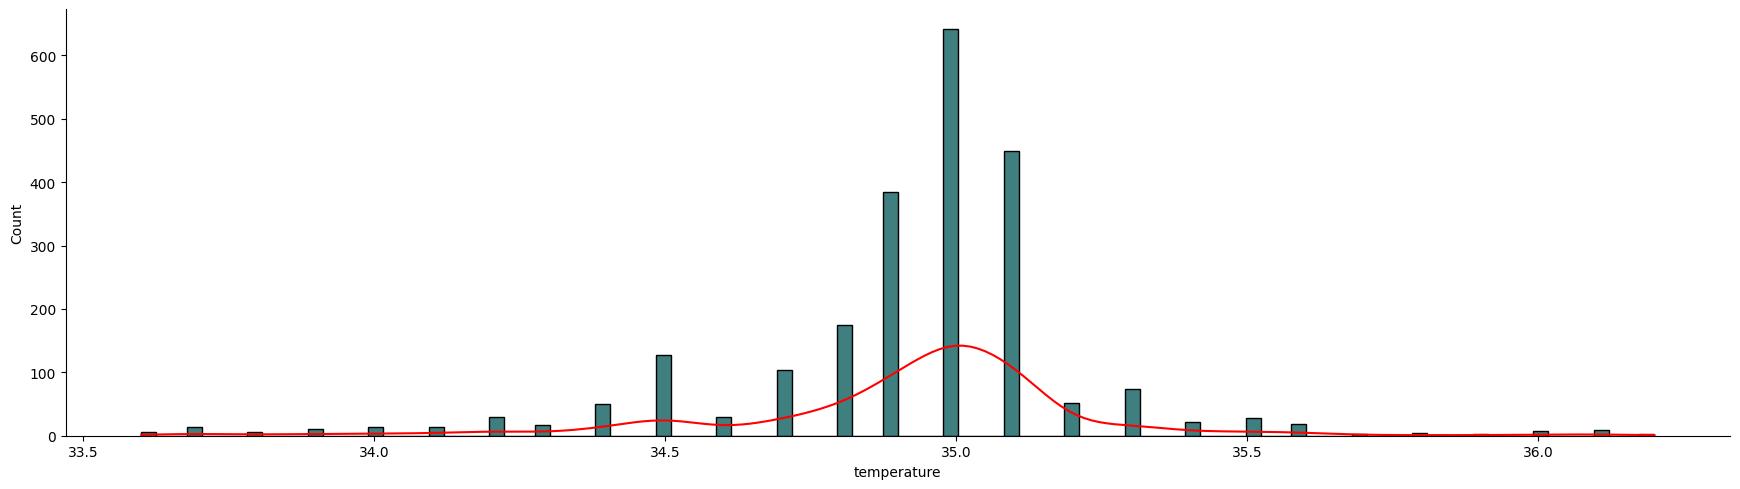

In [ ]:
sns.displot(data=solar_data, x="temperature", kde=True, bins = 100,color = "red", facecolor = "#3F7F7F",height = 5, aspect = 3.5);

<code style="background:yellow;color:red">The data of solar power generation is of 34 days </code>

<h1 style="text-align: justify; font-family: 'Lucida Calligraphy'; font-size:25px; color:#e90045">Faults & Abnormalities detection in solar power plant generation </h1>

<span style="background-color:red;
             color:white;
             font-size:17px;
             text-align:center;
             border-radius:30px 80px;
             font-weight:bold;
             border:2px solid red;
             padding:0px 20px;">7. Multiple Plotting of Voltage generation on per day basis.
</span>

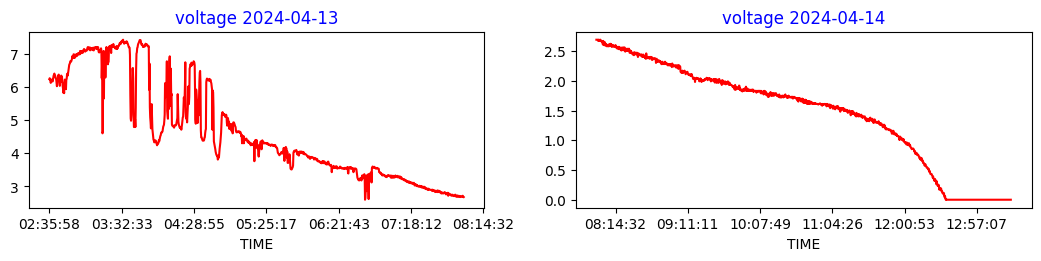

In [ ]:
solar_dc = solar_data.pivot_table(values='voltage', index='TIME', columns='DATE')

def Daywise_plot(data= None, row = None, col = None, title='voltage'):
    cols = data.columns # take all column
    gp = plt.figure(figsize=(20,40))

    gp.subplots_adjust(wspace=0.2, hspace=0.5)
    for i in range(1, len(cols)+1):
        ax = gp.add_subplot(row,col, i)
        data[cols[i-1]].plot(ax=ax, color='red')
        ax.set_title('{} {}'.format(title, cols[i-1]),color='blue')

Daywise_plot(data=solar_dc, row=12, col=3)

<blockquote style="margin-right:auto; margin-left:auto; background-color: #FAFAD2; padding: 1em; margin:3px;font-size:20px;font-family:Comic Sans Ms;color:#660000;letter-spacing:0.7px;text-align: justify;">

> The reason we get this shape is based on the angle of the sun to your panels. In the early morning, when the sun is still rising, it’s essentially at its lowest point in the sky. In order for the sunlight to reach your panels at this time of the day, it has to cut through the most amount of atmosphere. This is important to note, because energy from the sun is absorbed when it travels through the atmosphere. So, this means that the more atmosphere it travels through, the more energy is absorbed and the less that is available for your panels to convert into electricity. At midday, when the sun is directly overhead, sunlight doesn’t need to travel through as much atmosphere. Therefore, your panels will absorb more sunlight during this time.

- In winter, the same concept applies. However, on gloomier winter days there may be less sunlight for your panels to absorb.
- This can simply be explained by the sun being positioned lower in the sky than it is during summer.

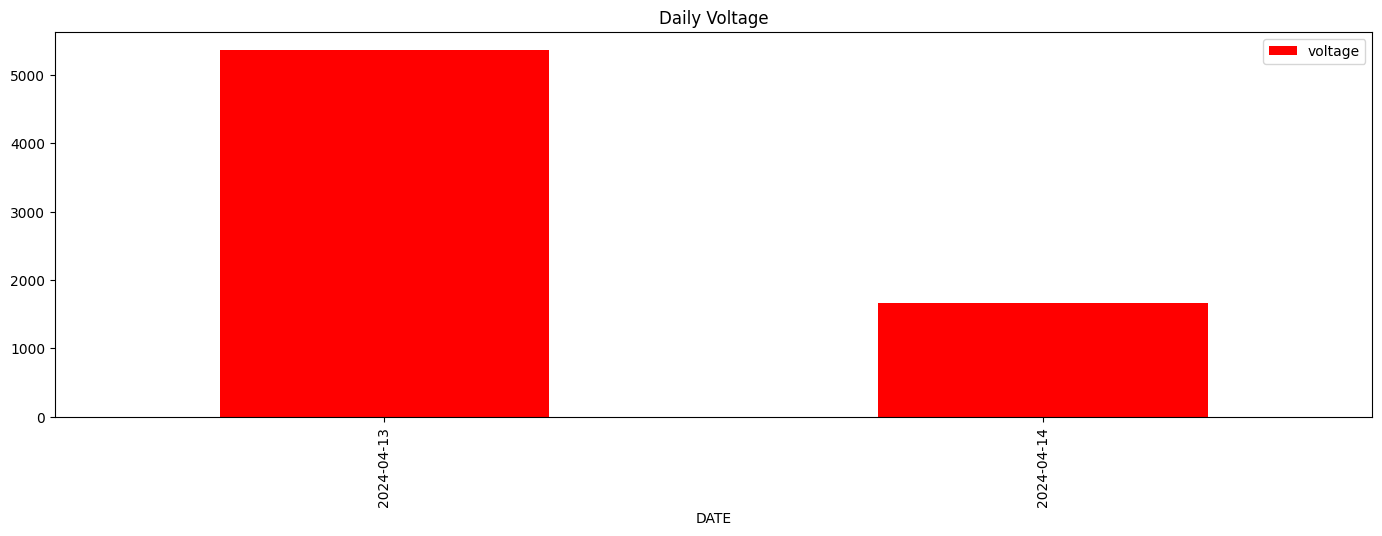

In [ ]:
daily_dc = solar_data.groupby('DATE')['voltage'].agg('sum')

ax = daily_dc.sort_values(ascending=False).plot.bar(figsize=(17,5), legend=True,color='red')
plt.title('Daily Voltage')
plt.show()

<span style="background-color:red;
             color:white;
             font-size:17px;
             text-align:center;
             border-radius:30px 80px;
             font-weight:bold;
             border:2px solid red;
             padding:0px 20px;">8. Multiple Plotting of IRRADIATION generation on per day basis.
</span>

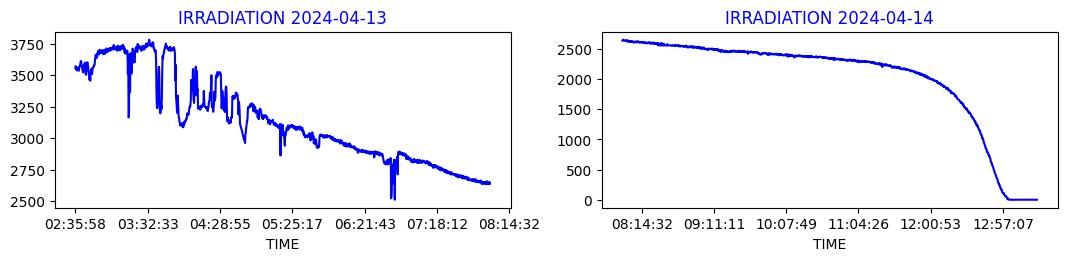

In [ ]:
solar_irradiation = solar_data.pivot_table(values='irradiation', index='TIME', columns='DATE')

def Daywise_plot(data= None, row = None, col = None, title='IRRADIATION'):
    cols = data.columns # take all column
    gp = plt.figure(figsize=(20,40))

    gp.subplots_adjust(wspace=0.2, hspace=0.5)
    for i in range(1, len(cols)+1):
        ax = gp.add_subplot(row,col, i)
        data[cols[i-1]].plot(ax=ax, color='blue')
        ax.set_title('{} {}'.format(title, cols[i-1]),color='blue')

Daywise_plot(data=solar_irradiation, row=12, col=3)

<blockquote style="margin-right:auto; margin-left:auto; background-color: #FAFAD2; padding: 1em; margin:3px;font-size:20px;font-family:Comic Sans Ms;color:#660000;letter-spacing:0.7px;text-align: justify;">

**IRRADIATION graph pattern is looking very similar to the corresponding Voltage generation on per day basis.**

- In solar power plant DC_POWER or Output power is mostly depends on IRRADIATION .Or it is not wrong to say that it’s directly proportional.

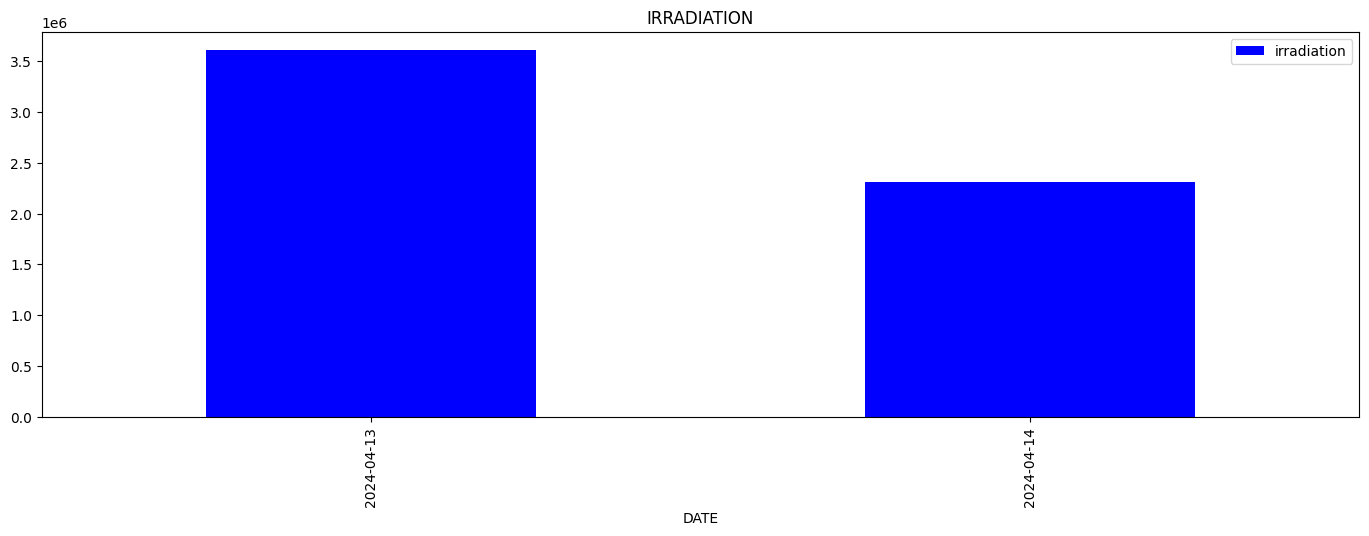

In [ ]:
daily_irradiation = solar_data.groupby('DATE')['irradiation'].agg('sum')

daily_irradiation.sort_values(ascending=False).plot.bar(figsize=(17,5), legend=True,color='blue')
plt.title('IRRADIATION')
plt.show()

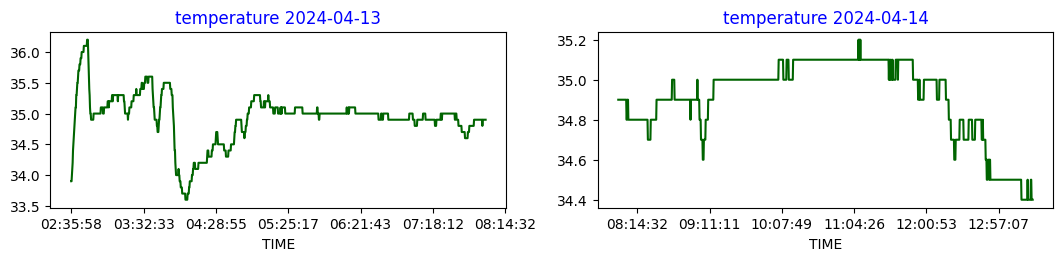

In [ ]:
solar_ambiant_temp = solar_data.pivot_table(values='temperature', index='TIME', columns='DATE')

def Daywise_plot(data= None, row = None, col = None, title='temperature'):
    cols = data.columns # take all column
    gp = plt.figure(figsize=(20,40))

    gp.subplots_adjust(wspace=0.2, hspace=0.5)
    for i in range(1, len(cols)+1):
        ax = gp.add_subplot(row,col, i)
        data[cols[i-1]].plot(ax=ax, color='darkgreen')
        ax.set_title('{} {}'.format(title, cols[i-1]),color='blue')

Daywise_plot(data=solar_ambiant_temp, row=12, col=3)

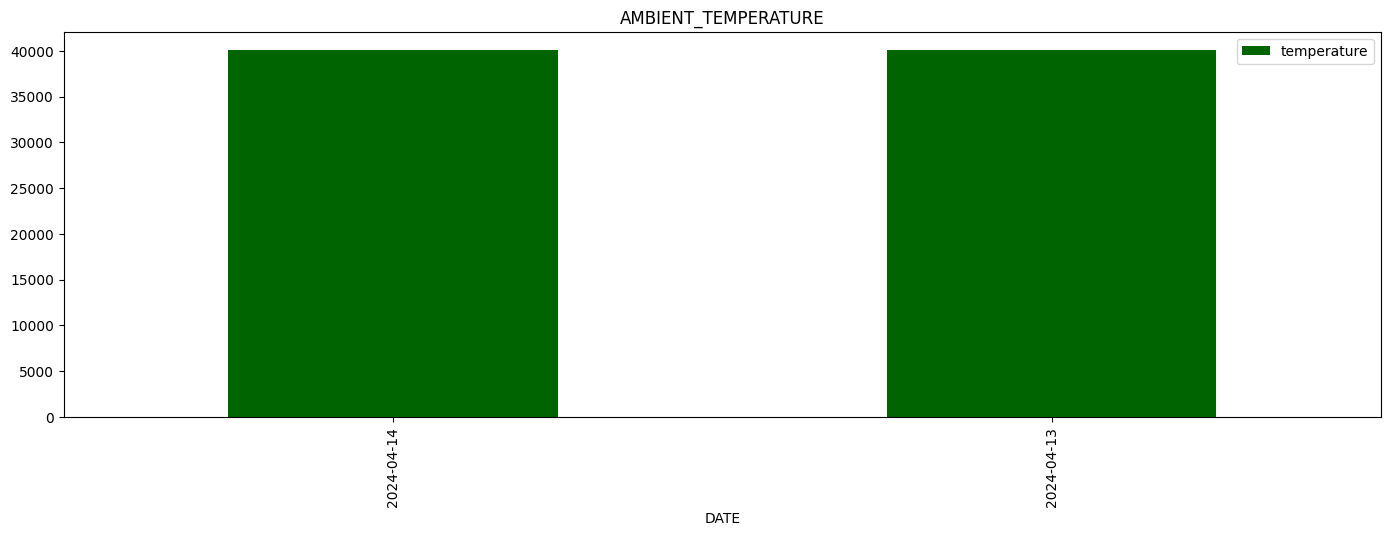

In [ ]:
daily_ambient_temp = solar_data.groupby('DATE')['temperature'].agg('sum')

daily_ambient_temp.sort_values(ascending=False).plot.bar(figsize=(17,5), legend=True,color='darkgreen')
plt.title('AMBIENT_TEMPERATURE')
plt.show()

<blockquote style="margin-right:auto; margin-left:auto; background-color: #FAFAD2; padding: 1em; margin:3px;font-size:20px;font-family:Comic Sans Ms;color:#660000;letter-spacing:0.7px;text-align: justify;">

**Possible Reasons for these large fluctuation in the DC_POWER, IRRADIATION, Ambient temperature, Module temperature:**

> At about 12 O’clock there is a sharp decline in the DC_POWER generation from 700 to almost 20 KWatt.

> And at the same time IRRADIATION fall from 0.6 to 0.3 almost half.

> Ambient temperature and Module temperature also fall drastically. Module temperature from 45 C to 35 C & Ambient temperature is also reduced.

<code style="background:yellow;color:red">The possible reason for this reduction is due to may be heavy rain and heavily clouded sky and bad weather. There is almost very less possibility of any fault in the system </code>

<h1 style="text-align: justify; font-family: 'Lucida Calligraphy'; font-size:30px; color:#e90045">Solar Power Prediction</h1>

In [ ]:
import pandas as pd
solar_data = pd.read_csv('/content/drive/MyDrive/solar predict.csv')
df1 = solar_data.copy()
X = df1.drop(['id', 'voltage', 'Date_Time', 'DATE', 'TIME', 'DATE_STRING'], axis=1)
y = df1['voltage']

In [ ]:
X.head()

,temperature,humidity,irradiation,DAY,MONTH,HOURS,MINUTES,TOTAL MINUTES PASS,total yield
0,33.9,65.7,3569,13,4,2,35,155,1646.178268
1,33.9,65.5,3549,13,4,2,36,156,1646.178268
2,34.0,65.4,3568,13,4,2,36,156,1588.076799
3,34.1,65.1,3547,13,4,2,36,156,1623.171950
4,34.2,65.1,3538,13,4,2,37,157,1865.151873


In [ ]:
y.head()

0    6.23
1    6.26
2    6.24
3    6.20
4    6.12
Name: voltage, dtype: float64

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=.2,random_state=21)

<span style="background-color:yellow;
             color:Black;
             font-size:25px;
             text-align:center;
             border-radius:30px 80px;
             font-weight:bold;
             border:2px solid red;
             padding:0px 20px;">1. LinearRegression
</span>

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

lr_clf = LinearRegression()
lr_clf.fit(X_train,y_train)
score_lr = 100*lr_clf.score(X_test,y_test)
print(f'LR Model score = {score_lr:4.4f}%')

LR Model score = 97.2277%


In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

lr = LinearRegression()
lr.fit(X_train,y_train)
y_pred_lr = lr.predict(X_test)
R2_Score_lr = round(r2_score(y_pred_lr,y_test) * 100, 2)

print("R2 Score : ",R2_Score_lr,"%")

R2 Score :  97.25 %


In [ ]:
prediction = lr.predict(X_test)
print(prediction)

[ 6.84393605e+00  4.43755340e+00  3.08565301e+00  6.98666162e+00
  6.87777798e+00  2.98553980e+00  2.98202872e-01  4.39658112e+00
  1.19572258e+00  4.06514993e+00 -4.61377829e-01  4.50111130e+00
  1.89270187e+00  2.21238343e+00  3.25123273e+00  6.51597352e+00
  8.05320745e-02 -9.17941100e-01  4.10055424e+00  4.57895834e+00
  5.35571261e+00  4.42372811e+00  2.93405602e+00  2.77940915e+00
  1.28168377e+00  6.96961705e+00  4.48243713e+00  1.96316881e+00
  2.28135145e+00  2.30986277e+00  1.47628415e+00  3.68873299e+00
  1.82192950e+00  3.03383537e+00  8.19671924e-01  1.87618099e+00
  5.23536305e+00  5.42835608e+00  6.76819136e+00  6.64038676e+00
  6.75369662e-01  1.83050470e+00  2.97864925e+00  4.53119421e+00
  2.27929402e+00  6.22148288e+00  2.02330271e+00  9.68970696e-01
  9.38878965e-03  4.65595993e+00 -2.69635699e-02  6.57130789e+00
  4.03100638e+00  4.69150864e+00  3.03357691e+00  4.01762621e+00
  6.84256775e+00  6.83590384e+00  2.23786081e+00  3.02388777e+00
  4.47633377e+00  7.77037

In [ ]:
cross_checking = pd.DataFrame({'Actual' : y_test , 'Predicted' : prediction})
cross_checking.head()

,Actual,Predicted
116,7.15,6.843936
623,4.24,4.437553
958,3.31,3.085653
65,6.87,6.986662
109,7.13,6.877778


In [ ]:
cross_checking['Error'] = cross_checking['Actual'] - cross_checking['Predicted']
cross_checking.head()

,Actual,Predicted,Error
116,7.15,6.843936,0.306064
623,4.24,4.437553,-0.197553
958,3.31,3.085653,0.224347
65,6.87,6.986662,-0.116662
109,7.13,6.877778,0.252222


In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

# Calculate R2 Score
R2_Score_lr = round(r2_score(y_test, y_pred_lr) * 100, 2)

# Calculate RMSE
RMSE_lr = round(mean_squared_error(y_test, y_pred_lr, squared=False), 2)

# Calculate MAE
MAE_lr = round(mean_absolute_error(y_test, y_pred_lr), 2)

print("R2 Score:", R2_Score_lr, "%")
print("RMSE:", RMSE_lr)
print("MAE:", MAE_lr)


R2 Score: 97.23 %
RMSE: 0.33
MAE: 0.22


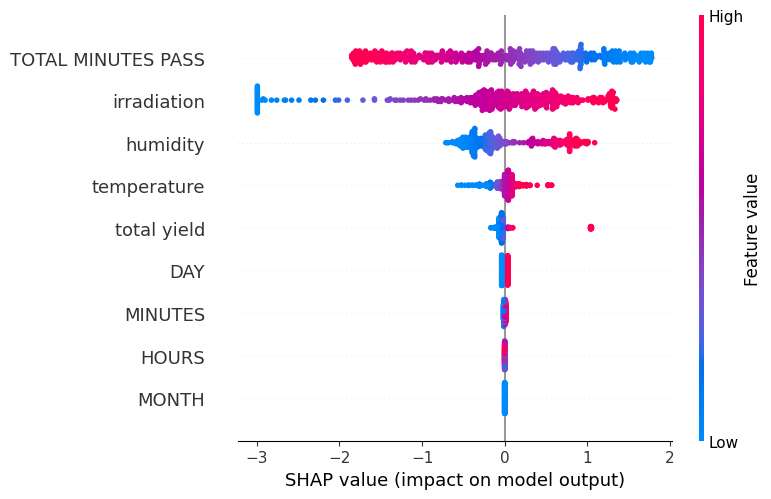

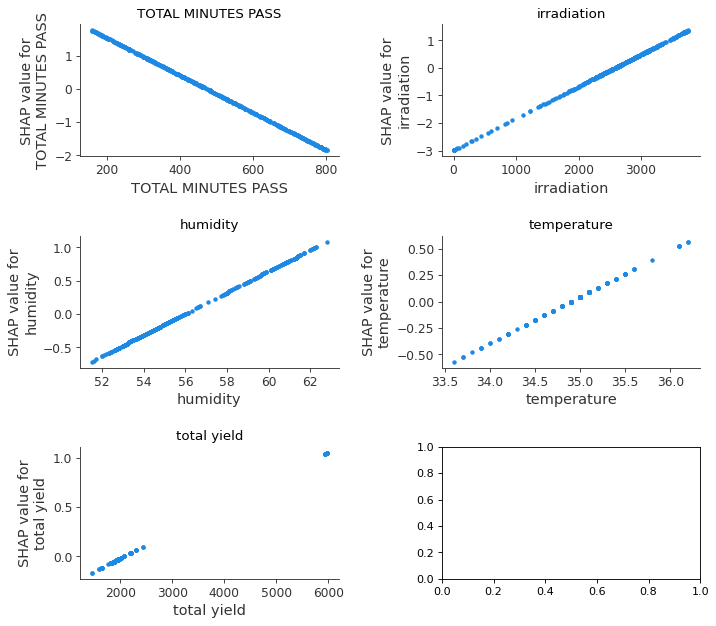

<Figure size 640x480 with 0 Axes>

,Actual,Predicted,Error
830,3.580000,3.591669,-0.011669
1441,2.000000,2.106058,-0.106058
315,4.800000,5.235363,-0.435363
46,5.930000,6.938073,-1.008073
2090,0.260000,0.571437,-0.311437
2230,0.000000,0.031749,-0.031749
1647,1.750000,1.878388,-0.128388
153,6.760000,6.640387,0.119613
1256,2.470000,2.333067,0.136933
2112,0.060000,0.387001,-0.327001


In [ ]:
import shap
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np


explainer = shap.Explainer(lr, X_train)

shap_values = explainer.shap_values(X_test)

# Visualize SHAP summary plot
shap.summary_plot(shap_values, X_test)
top_features = 5  # Number of top features to visualize
num_cols = 2  # Number of columns (graphs per row)
num_rows = (top_features + num_cols - 1) // num_cols

fig, axes = plt.subplots(num_rows, num_cols, figsize=(10, 3*num_rows), dpi=80)


if num_rows == 1:
    axes = np.reshape(axes, (1, num_cols))


top_feature_names = X_test.columns[np.argsort(-np.abs(shap_values).mean(0))[:top_features]]

for i, feature in enumerate(top_feature_names):
    row = i // num_cols
    col = i % num_cols
    shap.dependence_plot(feature, shap_values, X_test, interaction_index=None, show=False, ax=axes[row, col])
    axes[row, col].set_title(feature)

plt.subplots_adjust(wspace=0.4, hspace=0.6)

plt.show()

plt.tight_layout()
plt.show()

"""top_features = 5  # Change this value to visualize more or fewer features
for feature in X_test.columns[np.argsort(-np.abs(shap_values).mean(0))[:top_features]]:
    shap.dependence_plot(feature, shap_values, X_test, interaction_index=None, show=False)
"""

cross_checking_final = cross_checking[cross_checking['Error'] <= 0.5]


anomalies_sample = cross_checking_final.sample(25).style.background_gradient(cmap='coolwarm')

anomalies_sample = anomalies_sample.set_properties(**{
    'font-family': 'Lucida Calligraphy',
    'color': 'LightGreen',
    'font-size': '15px'
})


anomalies_sample




In [ ]:
!pip install shap

In [ ]:
plt.figure(figsize=(10, 6))
cross_checking_final['Error'].value_counts().plot(kind='bar', color='red')
plt.xlabel('Error')
plt.ylabel('Count')
plt.title('Number of Anomalies Detected')
plt.xticks(rotation=0)
plt.ylim(0, 15)
plt.show()


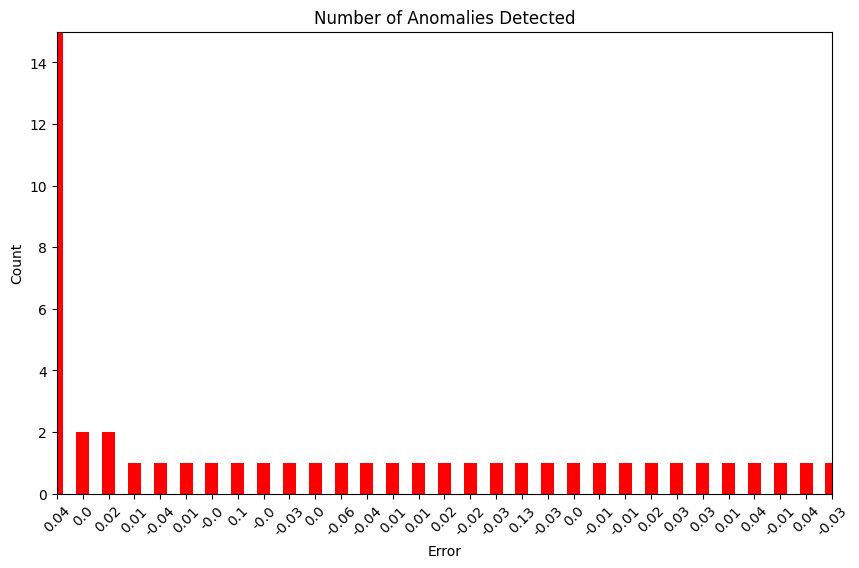

In [ ]:



plt.figure(figsize=(10, 6))
ax = cross_checking_final['Error'].value_counts().plot(kind='bar', color='red')

plt.xlabel('Error')
plt.ylabel('Count')
plt.title('Number of Anomalies Detected')


error_values = cross_checking_final['Error'].unique()
error_values_rounded = [round(ev, 2) for ev in error_values]


plt.xticks(range(len(error_values)), error_values_rounded, rotation=45)


plt.ylim(0, 15)
plt.xlim(0,30)
plt.show()


<span style="background-color:yellow;
             color:Black;
             font-size:25px;
             text-align:center;
             border-radius:30px 80px;
             font-weight:bold;
             border:2px solid red;
             padding:0px 20px;">2. RandomForestRegressor
</span>

In [ ]:

from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error


rfr = RandomForestRegressor()
rfr.fit(X_train, y_train)


y_pred_rfr = rfr.predict(X_test)


r2_rfr = r2_score(y_test, y_pred_rfr)


rmse_rfr = mean_squared_error(y_test, y_pred_rfr, squared=False)


mae_rfr = mean_absolute_error(y_test, y_pred_rfr)

print("R-squared score:", r2_rfr)
print("RMSE:", rmse_rfr)
print("MAE:", mae_rfr)


R-squared score: 0.9995587916115872
RMSE: 0.04163091338996757
MAE: 0.02430801172320775


<span style="background-color:yellow;
             color:Black;
             font-size:25px;
             text-align:center;
             border-radius:30px 80px;
             font-weight:bold;
             border:2px solid red;
             padding:0px 20px;">3. DecisionTreeRegressor
</span>

In [ ]:
from sklearn.tree import DecisionTreeRegressor
dtr = DecisionTreeRegressor()
dtr.fit(X_train,y_train)

y_pred_dtr = rfr.predict(X_test)
R2_Score_dtr = round(r2_score(y_pred_dtr,y_test) * 100, 2)

print("R2 Score : ",R2_Score_dtr,"%")

R2 Score :  99.96 %


In [ ]:
from sklearn.ensemble import GradientBoostingRegressor


gbr = GradientBoostingRegressor()
gbr.fit(X_train, y_train)


y_pred_gbr = gbr.predict(X_test)

R2_Score_gbr = round(r2_score(y_test, y_pred_gbr) * 100, 2)

print("R2 Score: ", R2_Score_gbr, "%")

from sklearn.metrics import mean_squared_error, mean_absolute_error



RMSE_lr = round(mean_squared_error(y_test, y_pred_gbr, squared=False), 2)

MAE_lr = round(mean_absolute_error(y_test, y_pred_gbr), 2)

print("R2 Score:", R2_Score_lr, "%")
print("RMSE:", RMSE_lr)
print("MAE:", MAE_lr)


R2 Score:  99.94 %
R2 Score: 97.23 %
RMSE: 0.05
MAE: 0.03


<span style="background-color:red;
             color:white;
             font-size:17px;
             text-align:center;
             border-radius:30px 80px;
             font-weight:bold;
             border:2px solid red;
             padding:0px 20px;">12. Result Prediction
</span>

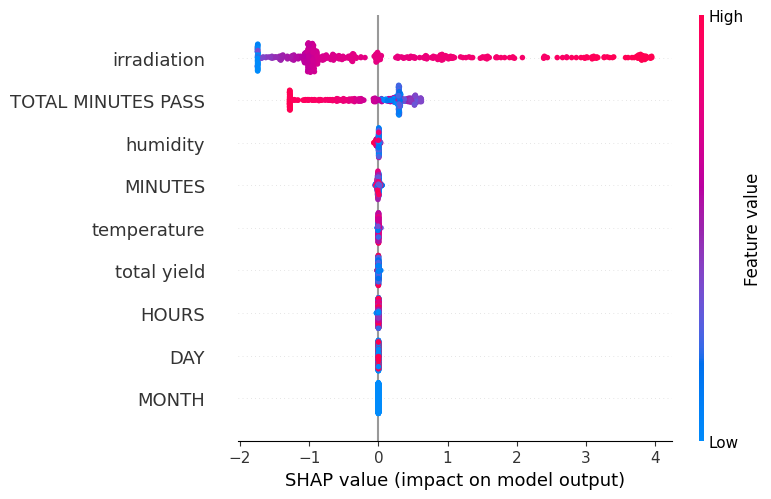

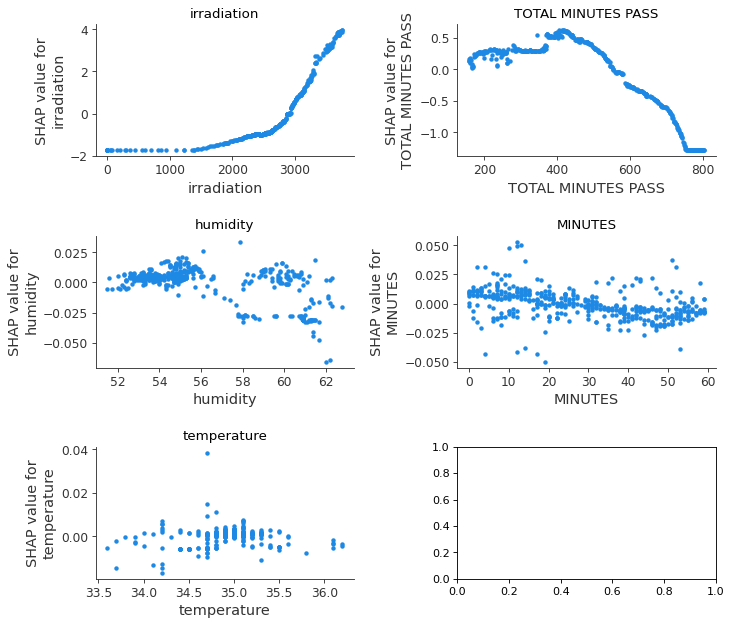

,Actual,Predicted,Error
1558,1.850000,1.907981,-0.057981
611,4.240000,4.466172,-0.226172
2007,0.960000,0.968971,-0.008971
1729,1.620000,1.821930,-0.201930
1155,2.670000,2.472224,0.197776
1378,2.230000,2.237861,-0.007861
1845,1.480000,1.515419,-0.035419
172,7.260000,6.768191,0.491809
2042,0.700000,0.819672,-0.119672
1002,3.110000,3.023888,0.086112


In [ ]:
import shap
import pandas as pd
import matplotlib.pyplot as plt



explainer = shap.Explainer(rfr, X_train)


shap_values = explainer.shap_values(X_test)

shap.summary_plot(shap_values, X_test)
top_features = 5  # Number of top features to visualize
num_cols = 2  # Number of columns (graphs per row)
num_rows = (top_features + num_cols - 1) // num_cols  # Calculate number of rows needed


fig, axes = plt.subplots(num_rows, num_cols, figsize=(10, 3*num_rows), dpi=80)


if num_rows == 1:
    axes = np.reshape(axes, (1, num_cols))


top_feature_names = X_test.columns[np.argsort(-np.abs(shap_values).mean(0))[:top_features]]

for i, feature in enumerate(top_feature_names):
    row = i // num_cols
    col = i % num_cols
    shap.dependence_plot(feature, shap_values, X_test, interaction_index=None, show=False, ax=axes[row, col])
    axes[row, col].set_title(feature)

plt.subplots_adjust(wspace=0.4, hspace=0.6)

plt.show()

cross_checking_final = cross_checking[cross_checking['Error'] <= 0.5]


anomalies_sample = cross_checking_final.sample(25).style.background_gradient(cmap='coolwarm')


anomalies_sample = anomalies_sample.set_properties(**{
    'font-family': 'Lucida Calligraphy',
    'color': 'black',
    'font-size': '15px'
})


anomalies_sample


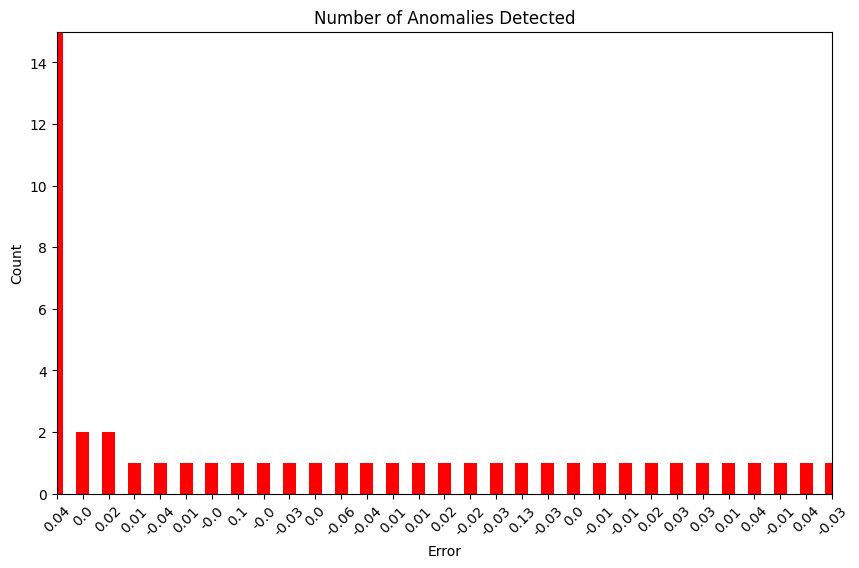

In [ ]:
import matplotlib.pyplot as plt


plt.figure(figsize=(10, 6))
ax = cross_checking_final['Error'].value_counts().plot(kind='bar', color='red')

plt.xlabel('Error')
plt.ylabel('Count')
plt.title('Number of Anomalies Detected')


error_values = cross_checking_final['Error'].unique()
error_values_rounded = [round(ev, 2) for ev in error_values]


plt.xticks(range(len(error_values)), error_values_rounded, rotation=45)


plt.ylim(0, 15)
plt.xlim(0,30)

plt.show()


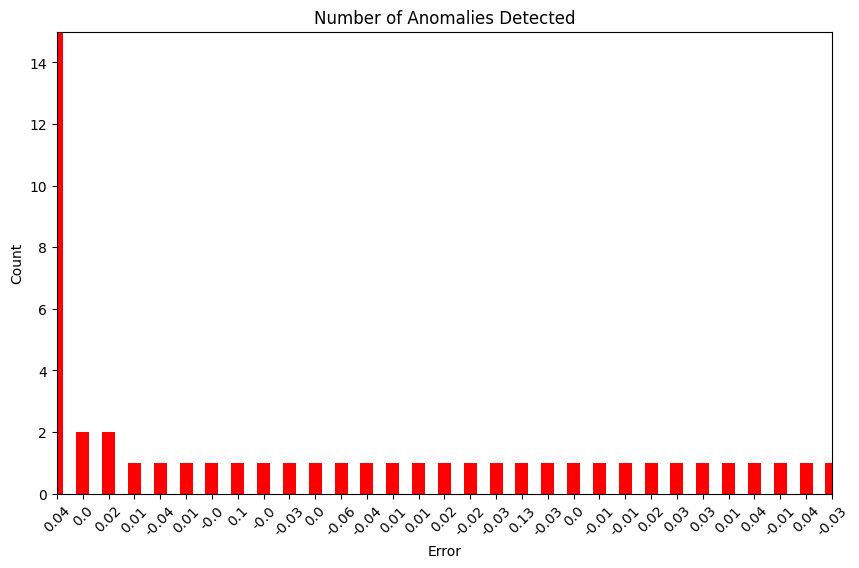

In [ ]:
import matplotlib.pyplot as plt


cross_checking_final['Error'] = cross_checking_final['Error']

plt.figure(figsize=(10, 6))
ax = cross_checking_final['Error'].value_counts().plot(kind='bar', color='red')

plt.xlabel('Error')
plt.ylabel('Count')
plt.title('Number of Anomalies Detected')


error_values = cross_checking_final['Error'].unique()
error_values_rounded = [round(ev, 2) for ev in error_values]


plt.xticks(range(len(error_values)), error_values_rounded, rotation=45)

plt.ylim(0, 15)
plt.xlim(0,30)

plt.show()


In [ ]:
cross_checking_final  = cross_checking[cross_checking['Error'] <= 0.5]
cross_checking_final.sample(25).style.background_gradient(
        cmap='coolwarm').set_properties(**{
            'font-family': 'Lucida Calligraphy',
            'color': 'LigntGreen',
            'font-size': '15px'
        })

,Actual,Predicted,Error
1042,2.920000,2.917053,0.002947
128,7.160000,7.177600,-0.017600
762,3.730000,3.740300,-0.010300
963,3.320000,3.297600,0.022400
901,3.550000,3.553600,-0.003600
759,3.700000,3.707600,-0.007600
1006,3.100000,3.112900,-0.012900
369,5.080000,5.312717,-0.232717
556,4.280000,4.332800,-0.052800
37,6.020000,5.933400,0.086600
